In [10]:
import nn
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [11]:
data = pd.read_csv('train.csv')

In [12]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

# validation set
data_dev = data[:1000].T 
Y_dev = data_dev[0] # extract labels
X_dev = data_dev[1:n] / 255.0  # normalize

# train set
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.0 

In [14]:
X_train[:, 0].shape

(784,)

In [39]:
W1, b1, W2, b2 = nn.gradient_descent(X_train, Y_train, 100, 0.8)

Iteration:  0
[4 8 6 ... 8 8 6] [0 0 9 ... 2 2 6]
Accuracy:  0.15241463414634146
Iteration:  10
[0 0 2 ... 3 2 0] [0 0 9 ... 2 2 6]
Accuracy:  0.4746341463414634
Iteration:  20
[0 0 9 ... 2 2 6] [0 0 9 ... 2 2 6]
Accuracy:  0.6148292682926829
Iteration:  30
[0 0 4 ... 2 2 6] [0 0 9 ... 2 2 6]
Accuracy:  0.6269756097560976
Iteration:  40
[0 0 9 ... 2 2 6] [0 0 9 ... 2 2 6]
Accuracy:  0.719609756097561
Iteration:  50
[0 0 9 ... 2 2 6] [0 0 9 ... 2 2 6]
Accuracy:  0.762390243902439
Iteration:  60
[0 0 9 ... 2 2 6] [0 0 9 ... 2 2 6]
Accuracy:  0.791
Iteration:  70
[0 0 9 ... 2 2 6] [0 0 9 ... 2 2 6]
Accuracy:  0.8015853658536586
Iteration:  80
[0 0 9 ... 2 2 6] [0 0 9 ... 2 2 6]
Accuracy:  0.8113170731707318
Iteration:  90
[0 0 9 ... 2 2 6] [0 0 9 ... 2 2 6]
Accuracy:  0.8439512195121951


In [42]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = nn.forward_prop(W1, b1, W2, b2, X)
    predictions = nn.get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index].reshape(-1, 1)  
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image_display = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image_display, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


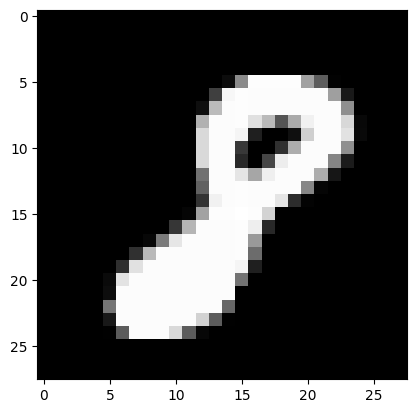

In [43]:
test_prediction(10, W1, b1, W2, b2)

Prediction:  [5]
Label:  8


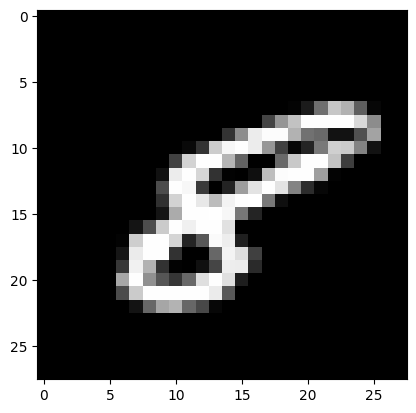

In [44]:
test_prediction(100, W1, b1, W2, b2)

Prediction:  [0]
Label:  0


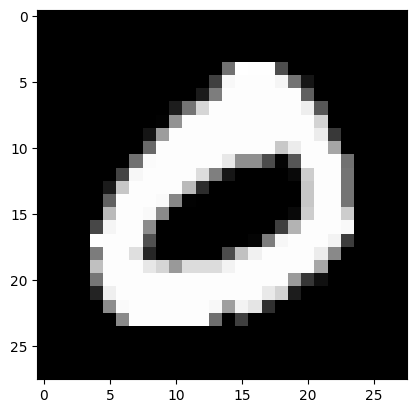

In [45]:
test_prediction(1, W1, b1, W2, b2)

Prediction:  [2]
Label:  8


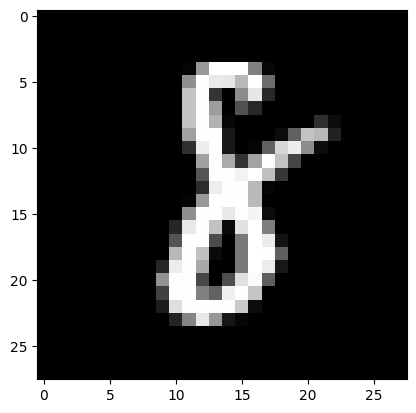

In [46]:
test_prediction(12, W1, b1, W2, b2)

Prediction:  [9]
Label:  9


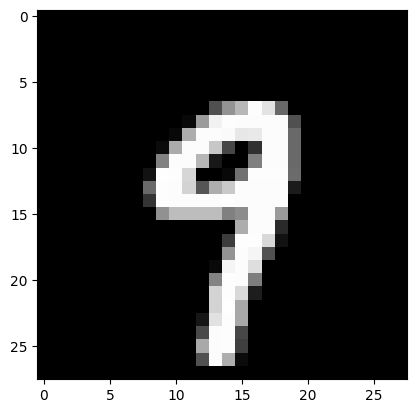

In [49]:
test_prediction(10000, W1, b1, W2, b2)

Prediction:  [2]
Label:  2


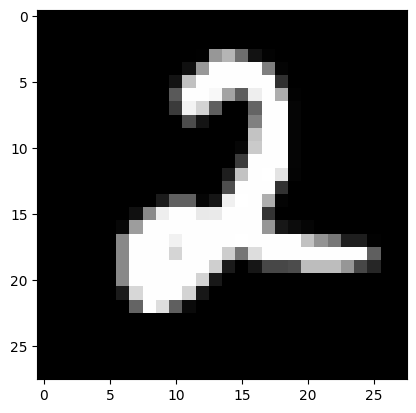

In [50]:
test_prediction(15000, W1, b1, W2, b2)

Prediction:  [3]
Label:  3


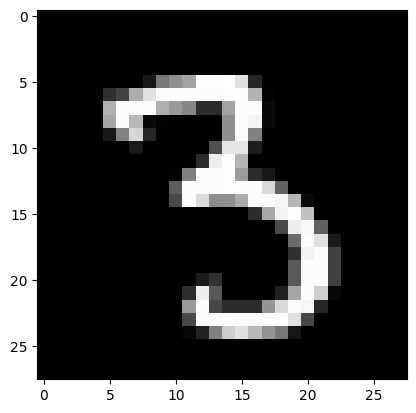

In [51]:
test_prediction(20000, W1, b1, W2, b2)

In [53]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
nn.get_accuracy(dev_predictions, Y_dev)

[7 4 1 0 6 2 0 2 1 0 2 8 8 6 6 1 2 8 1 9 6 0 5 3 0 1 4 6 0 7 1 6 0 9 3 7 4
 8 9 7 1 3 0 9 0 0 1 2 3 1 8 8 5 6 9 1 4 7 6 2 4 9 3 9 2 3 9 7 2 0 3 4 1 9
 2 3 3 1 5 3 5 4 9 6 2 6 1 8 9 4 4 4 6 0 4 6 0 2 2 1 7 3 0 1 6 6 9 6 6 8 5
 6 9 4 1 9 2 1 1 7 4 2 9 6 3 5 1 8 3 2 4 0 0 4 3 2 4 2 0 9 7 4 8 7 2 3 5 8
 6 3 7 7 9 6 4 0 0 8 0 9 7 0 3 9 3 2 0 0 3 3 9 3 4 9 9 0 0 6 5 3 2 9 7 6 2
 2 8 7 7 7 2 9 0 8 8 2 4 8 3 1 6 1 0 9 7 8 2 3 9 9 7 0 6 3 7 6 5 9 9 8 4 6
 5 4 3 9 6 5 0 6 6 2 7 7 2 0 3 6 0 5 6 2 8 0 9 3 2 1 7 9 3 4 1 3 4 2 8 9 6
 9 8 9 7 0 0 0 8 7 9 4 3 2 9 3 9 8 3 1 0 5 4 0 7 0 5 6 9 1 2 6 2 4 2 5 2 9
 4 2 3 4 3 9 3 0 3 3 6 2 6 4 6 9 0 4 3 4 1 2 0 0 4 3 5 5 5 6 5 9 6 9 4 8 1
 3 4 3 9 9 1 3 1 9 7 8 5 7 2 6 6 9 0 0 5 2 4 7 0 7 3 2 2 3 8 3 4 7 1 9 0 9
 8 7 3 9 9 3 0 9 3 7 3 6 7 0 9 8 4 5 3 0 6 7 3 7 8 9 1 3 6 4 0 2 3 7 9 3 8
 4 9 2 1 9 6 7 8 6 6 3 0 4 8 4 3 7 6 6 6 1 5 2 7 2 4 4 3 7 0 7 1 8 6 0 7 8
 1 9 3 9 1 0 5 8 6 1 3 3 1 7 0 2 4 1 2 4 9 8 6 6 0 6 0 0 5 6 2 3 8 1 3 6 6
 8 0 3 8 3 1 1 9 6 2 5 3 

np.float64(0.829)